## Logistic Regression

- Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class.

- If the estimated probability that an instance is greater than 50%, then the model predicts that the instance belongs to that class 1,
or else it predicts that it does not. This makes it a binary classifier. 

- In this notebook, we will look at the theory behind Logistic Regression and use it to indicating whether or not a particular internet user clicked on an Advertisement.

- We will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

### **This data set contains the following features:**

- ```Daily Time Spent on Site```: consumer time on-site in minutes

- ``` Age```: customer age in years

- ```Area Income```: Avg. Income of geographical area of consumer

- ```Daily Internet Usage```: Avg. minutes a day consumer is on the internet

- ```Ad Topic Line```: Headline of the advertisement

- ```City```: City of consumer

- ```Male```: Whether or not the consumer was male

- ```Country```: Country of consumer

- ```Timestamp```: Time at which consumer clicked on Ad or closed window

- ```Clicked on Ad```: 0 or 1 indicated clicking on Ad

## Load Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
sns.set_context('notebook')

import missingno as msno
from sklearn.preprocessing import LabelEncoder

#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [5]:
df = pd.read_csv(r'D:\static\Dataset\advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Basic model building based on the actual data

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
#     (StandardScaler(), num_columns),
    remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
X_train = pd.DataFrame(X_train, columns=num_columns)
X_test = pd.DataFrame(X_test, columns=num_columns)

In [9]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.936000    0.990769  0.961429    0.963385      0.963072
recall       0.991525    0.930636  0.961429    0.961081      0.961429
f1-score     0.962963    0.959762  0.961429    0.961362      0.961381
support    354.000000  346.000000  0.961429  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[351   3]
 [ 24 322]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.917197    0.986014      0.95    0.951606      0.952523
recall       0.986301    0.915584      0.95    0.950943      0.950000
f1-score     0.950495    0.949495      0.95    0.949995      0.949982
support    146.000000  154.000000      0.95  300.000000    300.

## Performance Measurement

**1. Confusion Matrix**
- Each row: actual class
- Each column: predicted class

**First row: Non-clicked Ads, the negative class:**

- 144 were correctly classified as Non-clicked Ads. True negatives.
- Remaining 13 were wrongly classified as clicked Ads. False-positive

**Second row: The clicked Ads, the positive class:**

- 2 were incorrectly classified as Non-clicked Ads. False negatives
- 141 were correctly classified clicked Ads. True positives

**2. Precision**
- Precision measures the accuracy of positive predictions. 
- Also called the precision of the classifier = 98.01%

**3. Recall**
- Precision is typically used with recall (Sensitivity or True Positive Rate).
- The ratio of positive instances that are correctly detected by the classifier. =91%

**4. F1 Score**
- F1  score is the harmonic mean of precision and recall. 
- Regular mean gives equal weight to all values. 
- Harmonic mean gives more weight to low values. = 94%

**5. Precision / Recall Tradeoff**
- Increasing precision reduced recall and vice versa

In [10]:
pred = lr_clf.predict(X_test)
pred 

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [11]:
df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred})
df1.head()

,Actual Value,Predicted Value
521,1,1
737,1,1
740,1,1
660,1,1
411,0,0


In [12]:
v=[]
for x in pred:
    if x==1:
        v.append('Yes,Clicked!')
    else:
        v.append('Not Clicked!')

df1['Clicked Or Not']=v
df1.head(10)

,Actual Value,Predicted Value,Clicked Or Not
521,1,1,"Yes,Clicked!"
737,1,1,"Yes,Clicked!"
740,1,1,"Yes,Clicked!"
660,1,1,"Yes,Clicked!"
411,0,0,Not Clicked!
678,0,0,Not Clicked!
626,0,0,Not Clicked!
513,1,1,"Yes,Clicked!"
859,0,0,Not Clicked!
136,1,1,"Yes,Clicked!"


In [13]:
X_test.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [14]:
X_test.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.521163,0.238095,0.622873,0.098543,1.0
1,0.656638,0.785714,0.420301,0.112155,0.0


Now Let us supoose we have a person , SAY, Mr.XYZ, whose features are as follows:
    
- Daily Time spent on site :30.00 

- Age :45
    
- Area Income :60000.20

- Daily Internet Usage :300.00

- Male :1(Yes)

Let us predict whether he would have clicked on Ad or not , based on our Prediction Model:

In [15]:
testcase=[[30.00,45,60000.20,300.00,1]]

In [16]:
tp=lr_clf.predict(testcase)
tp

array([0], dtype=int64)

In [17]:
acc_logreg = round(accuracy_score(pred, y_test)*100, 2)
acc_logreg

95.0

In [18]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       146
           1       0.99      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[144   2]
 [ 13 141]]


#### The Accuracy Score of 92+ shows that the model is successful in predicting the click through rates of the advertisements.

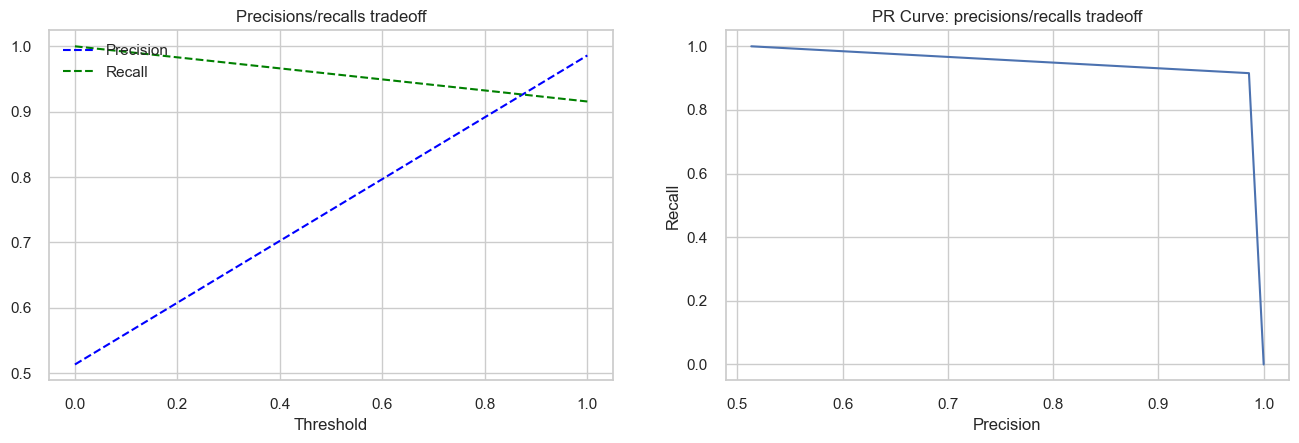

In [19]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

#### With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

## The Receiver Operating Characteristics (ROC) Curve

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.9509428927237147

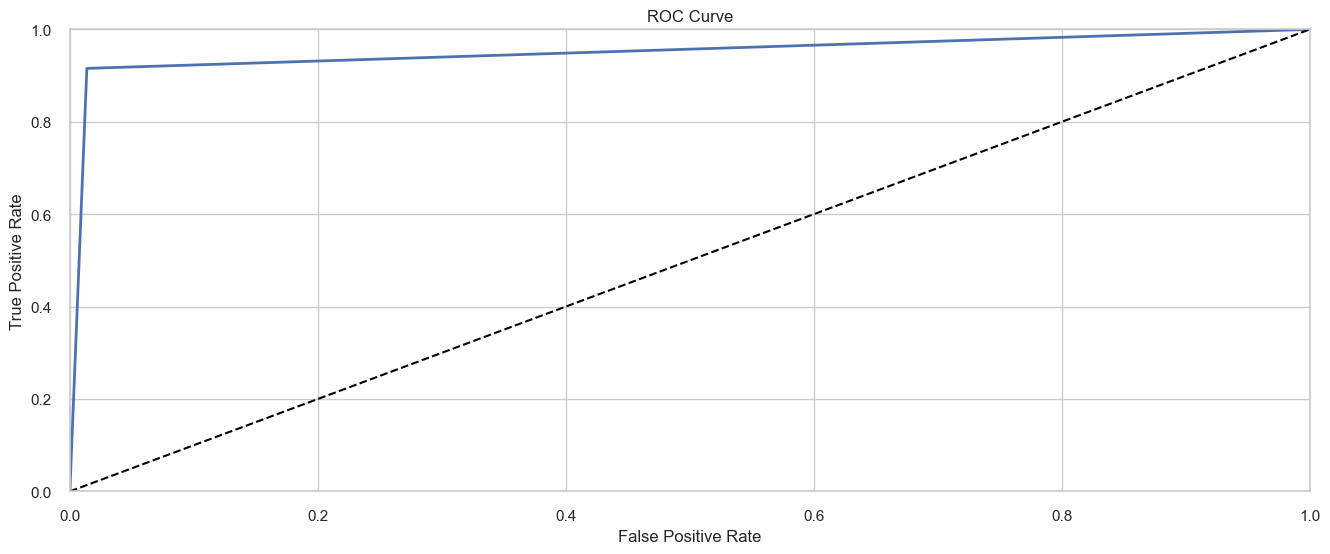

In [21]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(16,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

## Logistic Regression Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy',
                    verbose=1, n_jobs=-1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.5, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'saga'}
Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961538    0.988095  0.974286    0.974817      0.974665
recall       0.988701    0.959538  0.974286    0.974119      0.974286
f1-score     0.974930    0.973607  0.974286    0.974269      0.974276
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[350   4]
 [ 14 332]]

Test Result:
Accuracy Score: 95.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934211    0.972973  0.953333    0.953592      0.954109
recall       0.972603    0.935065  0.953333

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [LogisticRegression(),
          RandomForestClassifier(),
          XGBClassifier()
         ]

names = [ 'LogisticRegression',
          'RandomForestClassifier',
          'XGBClassifier']

for model,name in zip(models,names):
  m = model.fit(X_train,y_train)
  print(name, 'report:')
  print('Train score',model.score(X_train,y_train))
  print('Test score',model.score(X_test,y_test))
  print()
  print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
  print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
  print('*'*50)

LogisticRegression report:
Train score 0.9742857142857143
Test score 0.9533333333333334

Train confusion matrix:
 [[351   3]
 [ 15 331]] 

Test confusion matrix:
 [[143   3]
 [ 11 143]]
**************************************************
RandomForestClassifier report:
Train score 1.0
Test score 0.95

Train confusion matrix:
 [[354   0]
 [  0 346]] 

Test confusion matrix:
 [[140   6]
 [  9 145]]
**************************************************
XGBClassifier report:
Train score 1.0
Test score 0.95

Train confusion matrix:
 [[354   0]
 [  0 346]] 

Test confusion matrix:
 [[138   8]
 [  7 147]]
**************************************************


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [28]:
m = RandomForestClassifier().fit(X_train,y_train)
pred_y = m.predict(X_test)
print('*'*50)
print('Report')
print('model : RandomForestClassifier')
print('Train score',model.score(X_train,y_train))
print('Test score',model.score(X_test,y_test))
print()
print("accuracy: %.2f" %accuracy_score(y_test, pred_y))
print("Precision : %.3f" % precision_score(y_test, pred_y))
print("Recall : %.3f" % recall_score(y_test, pred_y))
print("F1 : %.3f" % f1_score(y_test, pred_y))
print()
print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
print('*'*50)

**************************************************
Report
model : RandomForestClassifier
Train score 1.0
Test score 0.95

accuracy: 0.96
Precision : 0.967
Recall : 0.948
F1 : 0.957

Train confusion matrix:
 [[354   0]
 [  0 346]] 

Test confusion matrix:
 [[138   8]
 [  7 147]]
**************************************************


In [29]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print('Train score',model.score(X_train,y_train))
print('Test score',model.score(X_test,y_test))

lrCoef = LogisticRegression().fit(X_train,y_train).coef_
print(lrCoef)

Train score 1.0
Test score 0.95
[[-5.02533198  2.87441382 -3.26818334 -5.81221042 -0.30907786]]


In [30]:
coefdf = pd.DataFrame(data=X_train.columns, index=range(0, len(lrCoef[0])), columns=['Feature'])
coefdf['Coef'] = lrCoef[0]
coefdf['Absuolute num of Coef'] = abs(lrCoef[0])
coefdf = coefdf.sort_values(by='Absuolute num of Coef', ascending=False).reset_index(drop=True)
coefdf

,Feature,Coef,Absuolute num of Coef
0,Daily Internet Usage,-5.812210,5.812210
1,Daily Time Spent on Site,-5.025332,5.025332
2,Area Income,-3.268183,3.268183
3,Age,2.874414,2.874414
4,Male,-0.309078,0.309078


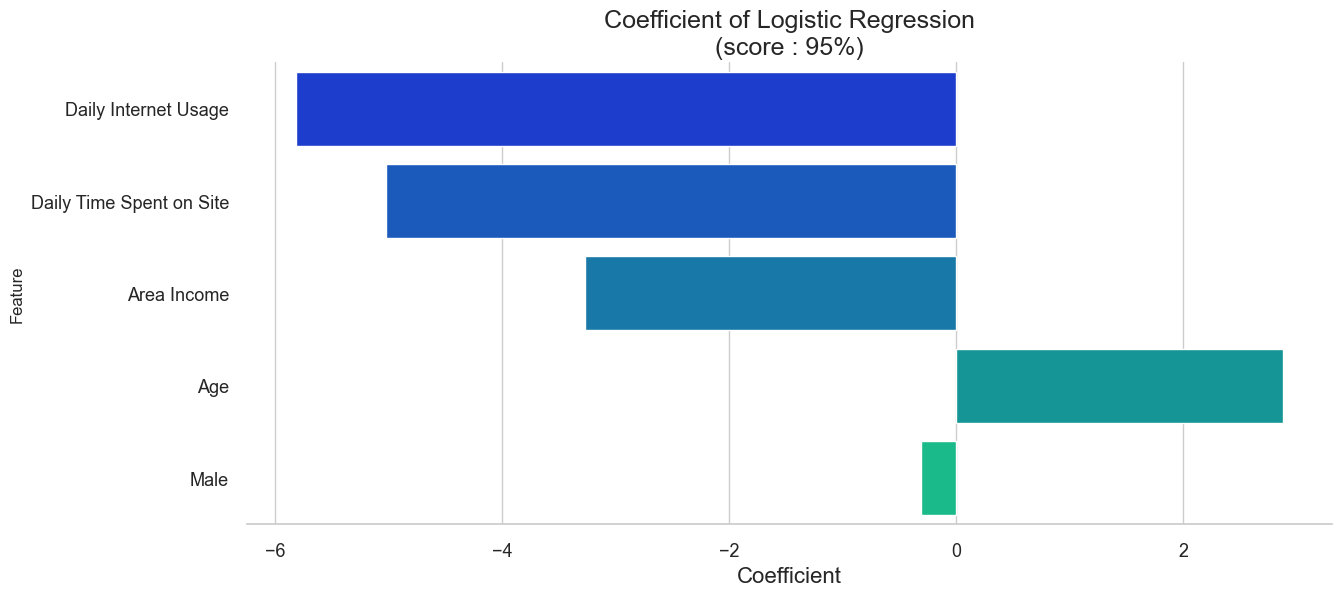

In [31]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=coefdf, y=coefdf['Feature'], x=coefdf['Coef'],palette='winter')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.title('Coefficient of Logistic Regression\n(score : 95%)', fontsize=18)
plt.xlabel('Coefficient',fontsize=16)

plt.savefig('Coefficient of Logistic Regression.png',fontsize=18)
sns.despine(left=True)
plt.show()

In [35]:
import shap

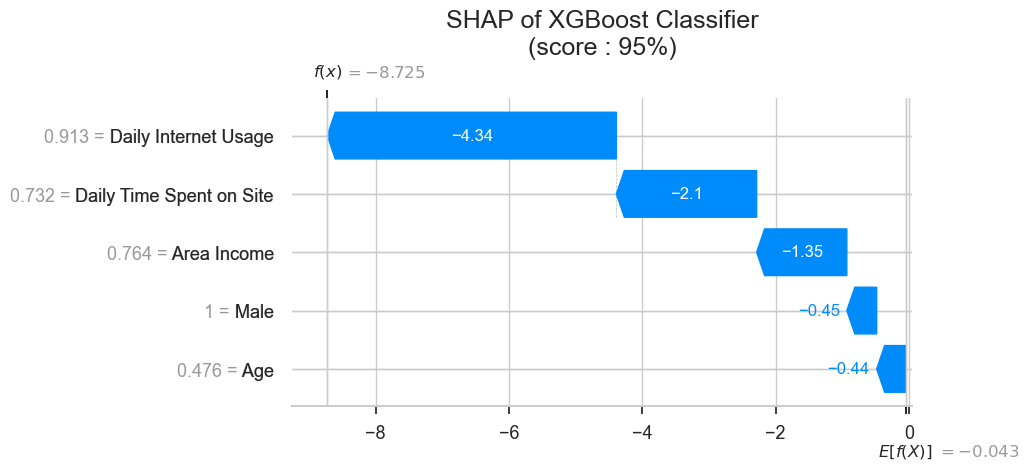

In [36]:
XGBmodel = XGBClassifier().fit(X_train, y_train)

explainer = shap.Explainer(XGBmodel)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0], show=False)
plt.title('SHAP of XGBoost Classifier\n(score : 95%)',fontsize=18)
plt.show()

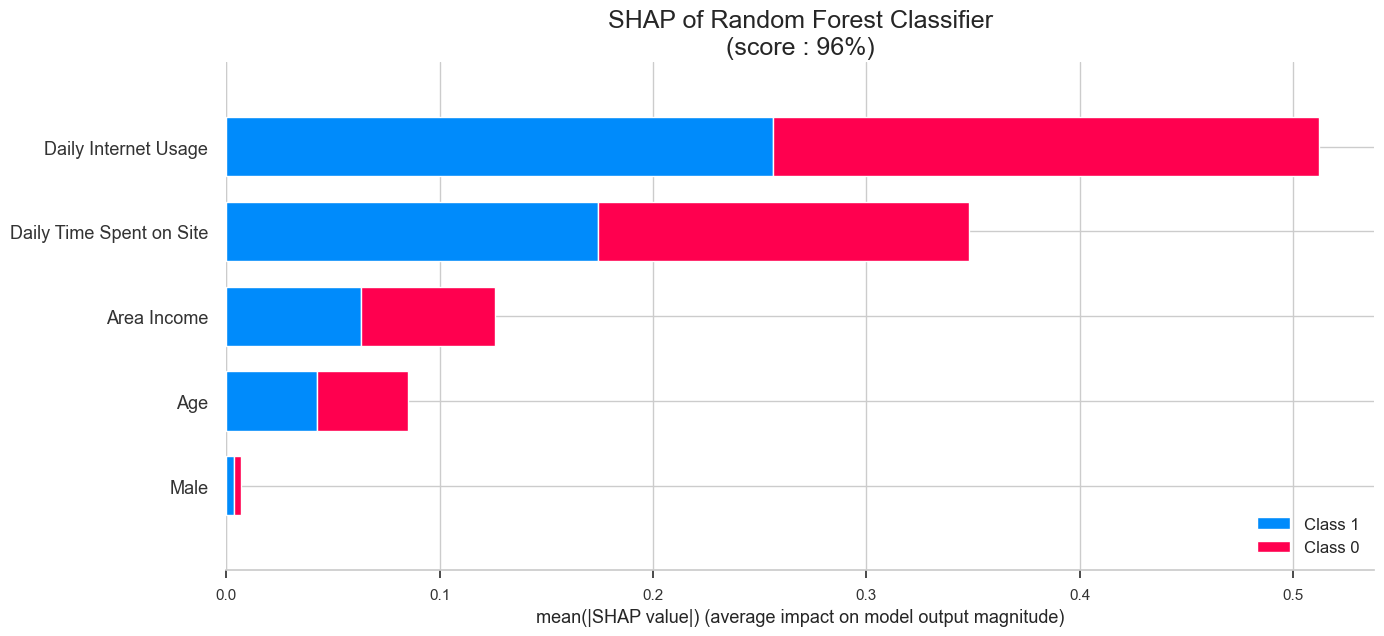

In [37]:
RFmodel = RandomForestClassifier().fit(X_train, y_train)

explainer = shap.TreeExplainer(RFmodel)
shap_values = explainer.shap_values(X_test)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# fig, ax = plt.subplots(figsize=(10,5))
shap.summary_plot(shap_values, X_test, plot_size=(14,6), show=False)
plt.title('SHAP of Random Forest Classifier\n(score : 96%)',fontsize=18)
plt.show()

In [38]:
from sklearn.inspection import permutation_importance

result = permutation_importance(RFmodel, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(14,6))
plt.title('Permutation Importance of Random Forest Classifier',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.boxplot(result.importances[sorted_idx].T,vert=False, labels=X.columns[sorted_idx]);

## Daily Internet Usage is the most important feature.

- The lower **Daily Internet Usage** and **Daily Time Spent on Site**, the more likely to click the ad.

- **Sex** and **age** are the least relevant feature.

- **Area Income** affects a little.

- Thus, targeting ads to the people who use the internet little and rarely spend time on a website is efficient to make more likely to click the ad.